In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/joiningdatawithpandas/SP500.csv
/kaggle/input/joiningdatawithpandas/zip_demo.p
/kaggle/input/joiningdatawithpandas/ward.p
/kaggle/input/joiningdatawithpandas/WorldBank_POP.csv
/kaggle/input/joiningdatawithpandas/taxi_owners.p
/kaggle/input/joiningdatawithpandas/movies.p
/kaggle/input/joiningdatawithpandas/ratings.p
/kaggle/input/joiningdatawithpandas/actors_movies.csv
/kaggle/input/joiningdatawithpandas/sequels.p
/kaggle/input/joiningdatawithpandas/business_owners.p
/kaggle/input/joiningdatawithpandas/stations.p
/kaggle/input/joiningdatawithpandas/licenses.p
/kaggle/input/joiningdatawithpandas/taglines.p
/kaggle/input/joiningdatawithpandas/cta_calendar.p
/kaggle/input/joiningdatawithpandas/WorldBank_GDP.csv
/kaggle/input/joiningdatawithpandas/crews.p
/kaggle/input/joiningdatawithpandas/census.p
/kaggle/input/joiningdatawithpandas/JoiningDataWithPandas.ipynb
/kaggle/input/joiningdatawithpandas/cta_ridership.p
/kaggle/input/joiningdatawithpandas/financials.p
/kaggle/input/j

# **Overview:** This is part of my learning journy for datascience track of # **Datacamp**. All datasets, code flows & explanations are part of their learning path. I am just using it here for my future reference & showcasing my skills

In [2]:
taxi_owners=pd.read_pickle(r'../input/joiningdatawithpandas/taxi_owners.p')
taxi_owners
print(taxi_owners.head())
print(taxi_owners.shape)

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
(3519, 5)


In [3]:
taxi_veh=pd.read_pickle(r'../input/joiningdatawithpandas/taxi_vehicles.p')
taxi_veh
print(taxi_veh.head())
print(taxi_veh.shape)

    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO
(3519, 6)


# **Merge**

In [4]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh,on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)
print(taxi_own_veh.head())

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')
     rid   vid         owner_x                 address    zip    make   model  \
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN  ALTIMA   
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA     CRV   
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA   
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645  TOYOTA   CAMRY   
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA   

   year fuel_type         owner_y  
0  2011    HYBRID  AGEAN TAXI LLC  
1  2014  GASOLINE    MANGIB CORP.  
2  2015  GASOLINE   FUNRIDE, INC.  
3  2014    HYBRID    ALQUSH CORP.  
4  2015  GASOLINE  EUNIFFORD INC.  


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


In [7]:
wards=pd.read_pickle(r'../input/joiningdatawithpandas/ward.p')
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [8]:
census=pd.read_pickle(r'../input/joiningdatawithpandas/census.p')
print(census.head())
print(census.shape)

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)


In [9]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census,on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


In [10]:
licenses=pd.read_pickle(r'../input/joiningdatawithpandas/licenses.p')
print(licenses.head())
print(licenses.shape)

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
(10000, 6)


In [11]:
biz_owners=pd.read_pickle(r'../input/joiningdatawithpandas/business_owners.p')
print(biz_owners.head())
print(biz_owners.shape)

  account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT
(21352, 4)


In [12]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners,on ='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account',ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


In [13]:
ridership=pd.read_pickle(r'../input/joiningdatawithpandas/cta_ridership.p')
print(ridership.head())
print(ridership.shape)

  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
(3285, 5)


In [14]:
cal=pd.read_pickle(r'../input/joiningdatawithpandas/cta_calendar.p')
print(cal.head())
print(cal.shape)

   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
(365, 4)


In [15]:
stations=pd.read_pickle(r'../input/joiningdatawithpandas/stations.p')
print(stations.head())
print(stations.shape)

  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)
(144, 3)


In [16]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on=['year','month','day'])

In [17]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on='station_id')

# **Criteria filtering**

In [18]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == '7') 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

0


In [19]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [20]:
zip_demo=pd.read_pickle(r'../input/joiningdatawithpandas/zip_demo.p')
print(zip_demo.head())
print(zip_demo.shape)

     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226
(66, 2)


In [21]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo,on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

In [22]:
land_use=pd.read_pickle(r'../input/joiningdatawithpandas/land_use.p')
print(land_use.head())
print(land_use.shape)

  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68
(50, 6)


In [23]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                .merge(licenses, on='ward', suffixes=('_cen','_lic'))
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


In [24]:
movies=pd.read_pickle(r'../input/joiningdatawithpandas/movies.p')
print(movies.head())
print(movies.shape)

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
(4803, 4)


In [25]:
financials=pd.read_pickle(r'../input/joiningdatawithpandas/financials.p')
print(financials.head())
print(financials.shape)

       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08
(3229, 3)


# **Left Join**

In [26]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id',how='left')
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [27]:
movie_to_genres=pd.read_pickle(r'../input/joiningdatawithpandas/movie_to_genres.p')
print(movie_to_genres.head())
print(movie_to_genres.shape)

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure
(12160, 2)


In [28]:
#Get top 10 most popular movies
pop_gen=movies.sort_values('popularity',ascending=False)
#print(pop_gen.head(10))
pop_movies=pop_gen.iloc[0:10,:]
print(pop_movies)

          id                                              title  popularity  \
4546  211672                                            Minions  875.581305   
4343  157336                                       Interstellar  724.247784   
1966  293660                                           Deadpool  514.569956   
2423  118340                            Guardians of the Galaxy  481.098624   
4220   76341                                 Mad Max: Fury Road  434.278564   
1867  135397                                     Jurassic World  418.708552   
4375      22  Pirates of the Caribbean: The Curse of the Bla...  271.972889   
1106  119450                     Dawn of the Planet of the Apes  243.791743   
4216  131631              The Hunger Games: Mockingjay - Part 1  206.227151   
2614  177572                                         Big Hero 6  203.734590   

     release_date  
4546   2015-06-17  
4343   2014-11-05  
1966   2016-02-09  
2423   2014-07-30  
4220   2015-05-13  
1867   201

# **Right join**

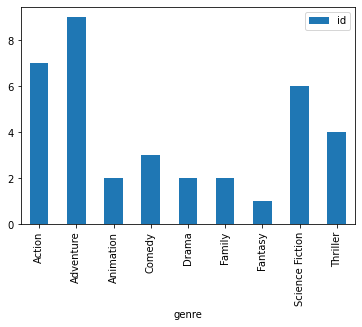

In [29]:
import matplotlib.pyplot as plt
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

In [30]:
movie_actors=pd.read_pickle(r'../input/joiningdatawithpandas/casts.p')
print(movie_actors.head())
print(movie_actors.shape)

    movie_id  cast_id character  gender    id               name
7          5       22   Jezebel       1  3122        Sammi Davis
8          5       23     Diana       1  3123  Amanda de Cadenet
9          5       24    Athena       1  3124     Valeria Golino
3          5       25   Elspeth       1  3125            Madonna
12         5       26       Eva       1  3126          Ione Skye
(106257, 6)


In [31]:
# To find actors who don't act in movies
# Iron Man 1 & Iron Man 2
#iron_man1_iron_man2_filter=((movie_actors['movie_id']==1726) or (iron_man2_filter=movie_actors['movie_id']==10138))
#movie_ids=[1726,10138]
#iron_man1_iron_man2_filter=((movie_actors['movie_id']==1726))

#print(movie_actors.loc[movie_actors['movie_id'].isin(movie_ids)])
#print(movie_actors.loc[movie_actors['movie_id'].isin(movie_ids)])

# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
#iron_1_and_2 = iron_1_actors.merge(iron_2_actors,on='id',how='outer',suffixes=['_1','_2'])

# Create an index that returns true if name_1 or name_2 are null
#m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
#print(iron_1_and_2[m].head())

In [32]:
crews=pd.read_pickle(r'../input/joiningdatawithpandas/crews.p')
print(crews.head())
print(crews.shape)

      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron
(42502, 4)


# To find different movie directors and the people they worked with in the same movie.

In [33]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
# Print the first few rows of direct_crews
print(direct_crews.head())
print(direct_crews.shape)

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  
(40845, 7)


# Do sequels earn more?

Lets find it out below

In [34]:
sequels=pd.read_pickle(r'../input/joiningdatawithpandas/sequels.p')
print(sequels.head())
print(sequels.shape)

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>
(4803, 3)


In [35]:
# Merge sequels and financials on index id
#sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
#orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', right_on='id', right_index=True,suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
#orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
#titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
#print(titles_diff.sort_values('diff',ascending=False).head())

Hence we have seen **Jurassic World** had one of the highest of all, improvement in revenue compared to the original movie

In [36]:
# Merge sequels and financials on index id
#sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
#orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',right_on='id', right_index=True,suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
#orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
#titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
#print(titles_diff.sort_values('diff',ascending=False).head())

# **Anti joins**

In [37]:
# Anti Joins

# Merge employees and top_cust
#empl_cust = employees.merge(top_cust, on='srid',how='left', indicator=True)

# Select the srid column where _merge is left_only
#srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
#print(employees[employees['srid'].isin(srid_list)])

# **Concat**

In [38]:
# Concatenate the tracks
#tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],sort=True)
#print(tracks_from_albums)

In [39]:
# Concatenate the tracks so the index goes from 0 to n-1
#tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],ignore_index=True,sort=True)
#print(tracks_from_albums)

In [40]:
# Concatenate the tracks, show only columns names that are in all tables
#tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],join='inner',sort=True)
#print(tracks_from_albums)

In [41]:
# Concatenate the tables and add keys
#inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
#avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
#avg_inv_by_month.plot(kind='bar')
#plt.show()

In [42]:
# Use the .append() method to combine the tracks tables
#metallica_tracks = tracks_ride.append([tracks_master,tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
#tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
#tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
#print(tracks_sold.sort_values('quantity',ascending=False))

Correlation between GDP & S&P500

In [43]:
sp500=pd.read_csv(r'../input/joiningdatawithpandas/SP500.csv')
print(sp500.head())
print(sp500.shape)

   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
(10, 2)


In [44]:
gdp=pd.read_csv(r'../input/joiningdatawithpandas/WorldBank_GDP.csv')
print(gdp.head())
print(gdp.shape)

    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
(40, 5)


# **Merge order**

In [45]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date',how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

# **Forward fill with merge order**

In [46]:
#Using forward fill for filling missing data
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date',how='left',fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP  Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012   
11  United States          USA  GDP (current US$)  2

In [47]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


In [48]:
pop=pd.read_csv(r'../input/joiningdatawithpandas/WorldBank_POP.csv')
print(pop.head())
print(pop.shape)

  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0
(2640, 5)


In [49]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp,pop, on=['Year','Country Name'] 
                             ,fill_method='ffill')

# Print ctry_date
print(ctry_date)

            Country Name Country Code_x   Indicator Name_x  Year  \
0            Afghanistan            NaN                NaN  2010   
1                Albania            NaN                NaN  2010   
2                Algeria            NaN                NaN  2010   
3         American Samoa            NaN                NaN  2010   
4                Andorra            NaN                NaN  2010   
...                  ...            ...                ...   ...   
2643  West Bank and Gaza            USA  GDP (current US$)  2018   
2644               World            USA  GDP (current US$)  2018   
2645         Yemen, Rep.            USA  GDP (current US$)  2018   
2646              Zambia            USA  GDP (current US$)  2018   
2647            Zimbabwe            USA  GDP (current US$)  2018   

               GDP Country Code_y   Indicator Name_y           Pop  
0              NaN            AFG  Population, total  2.918551e+07  
1              NaN            ALB  Population

In [50]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp,pop, on=['Country Name','Year'] 
                             ,fill_method='ffill')

# Print date_ctry
print(date_ctry)

     Country Name Country Code_x   Indicator Name_x  Year           GDP  \
0     Afghanistan            NaN                NaN  2010           NaN   
1     Afghanistan            NaN                NaN  2011           NaN   
2     Afghanistan            NaN                NaN  2012           NaN   
3     Afghanistan            NaN                NaN  2012           NaN   
4     Afghanistan            NaN                NaN  2013           NaN   
...           ...            ...                ...   ...           ...   
2643     Zimbabwe            USA  GDP (current US$)  2014  2.049410e+13   
2644     Zimbabwe            USA  GDP (current US$)  2015  2.049410e+13   
2645     Zimbabwe            USA  GDP (current US$)  2016  2.049410e+13   
2646     Zimbabwe            USA  GDP (current US$)  2017  2.049410e+13   
2647     Zimbabwe            USA  GDP (current US$)  2018  2.049410e+13   

     Country Code_y   Indicator Name_y         Pop  
0               AFG  Population, total  291855

# **Merge Asof**

In [51]:
# Use merge_asof() to merge jpm and wells
#pm_wells = pd.merge_asof(jpm,wells, on='date_time',suffixes=('','_wells'),direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
#jpm_wells_bac = pd.merge_asof(jpm_wells,bac,on='date_time',suffixes=('_jpm','_bac'),direction='nearest')


# Compute price diff
#price_diffs = jpm_wells_bac.diff()
#print(price_diffs)

# Plot the price diff of the close of jpm, wells and bac only
#price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
#plt.show()

In [52]:
# Merge gdp and recession on date using merge_asof()
#gdp_recession = pd.merge_asof(gdp,recession,on='date')

# Create a list based on the row value of gdp_recession['econ_status']
#is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
#gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
#plt.show()

In [53]:
filter_exp=movies['title'].isin(['Iron'])
print(movies[filter_exp])

Empty DataFrame
Columns: [id, title, popularity, release_date]
Index: []
